In [19]:
#importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import plotly.express as px
import mysql.connector

In [30]:

con = mysql.connector.connect(host='localhost',database='projeto_integrador',user='root',password='')
if con.is_connected():
    db_info = con.get_server_info()
    print("Conectado ao servidor MySQL versão ",db_info)
    cursor = con.cursor()
    cursor.execute("select database();")
    linha = cursor.fetchone()
    print("Conectado ao banco de dados ",linha)
#if con.is_connected():
#    cursor.close()
#    con.close()
#    print("Conexão ao MySQL foi encerrada")

Conectado ao servidor MySQL versão  5.5.5-10.1.21-MariaDB
Conectado ao banco de dados  ('projeto_integrador',)


In [71]:
dados = pd.read_sql('SELECT * FROM projeto_integrador.pi',con)

dados.loc[dados.gols_man > dados.gols_vis, 'Vitoria_man'] = 1
dados.loc[dados.gols_man < dados.gols_vis, 'Vitoria_man'] = -1
dados.loc[dados.gols_man == dados.gols_vis, 'Vitoria_man'] = 0

#df_salarios.loc[df_salarios.TotalPay > media, 'SalarioAcimaMedia'] = 'Sim'

In [74]:
# Exibição dos nossos dados
dados.head(20)

,ano_campeonato,data,horario,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,...,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis,Vitoria_man
0,2003,None,None,1,1,0,0,0,1,24,...,0,0,0,0,0,0,0,0,0,1.0
1,2003,None,None,1,2,0,0,0,2,16,...,0,0,0,0,0,0,0,0,0,1.0
2,2003,None,None,1,3,0,0,0,3,15,...,0,0,0,0,0,0,0,0,0,0.0
3,2003,None,None,1,4,0,0,0,4,19,...,0,0,0,0,0,0,0,0,0,0.0
4,2003,None,None,1,5,0,0,0,5,20,...,0,0,0,0,0,0,0,0,0,0.0
5,2003,None,None,1,6,0,0,0,6,13,...,0,0,0,0,0,0,0,0,0,1.0
6,2003,None,None,1,7,0,0,0,7,23,...,0,0,0,0,0,0,0,0,0,0.0
7,2003,None,None,1,8,0,0,0,8,17,...,0,0,0,0,0,0,0,0,0,0.0
8,2003,None,None,1,9,0,0,0,9,22,...,0,0,0,0,0,0,0,0,0,0.0
9,2003,None,None,1,10,0,0,0,10,18,...,0,0,0,0,0,0,0,0,0,0.0


In [23]:
dados.columns

Index(['ano_campeonato', 'data', 'horario', 'rodada', 'estadio', 'arbitro',
       'publico', 'publico_max', 'time_man', 'time_vis', 'tecnico_man',
       'tecnico_vis', 'colocacao_man', 'colocacao_vis',
       'valor_equipe_titular_man', 'valor_equipe_titular_vis',
       'idade_media_titular_man', 'idade_media_titular_vis', 'gols_man',
       'gols_vis', 'gols_1_tempo_man', 'gols_1_tempo_vis', 'escanteios_man',
       'escanteios_vis', 'faltas_man', 'faltas_vis', 'chutes_bola_parada_man',
       'chutes_bola_parada_vis', 'defesas_man', 'defesas_vis',
       'impedimentos_man', 'impedimentos_vis', 'chutes_man', 'chutes_vis',
       'chutes_fora_man', 'chutes_fora_vis'],
      dtype='object')

In [ ]:
print(dados.shape) #Exibe a forma do ndarray. Nº de linhas e Nº de colunas, respectivamente

print(dados.ndim) #Exibe o número de dimensões da estrutura

# Criando as tabelas dimensão

# Estatísticas Descritivas

In [24]:
dados[["chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man","defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man","chutes_vis","idade_media_titular_man","idade_media_titular_vis","chutes_fora_vis"]].describe()

,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,idade_media_titular_man,idade_media_titular_vis,chutes_fora_vis
count,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000
mean,1.593657,1.606884,0.298393,0.382022,0.149196,0.140521,1.055611,0.858484,19.045655,18.978666,0.484853
std,4.848282,4.886906,1.064089,1.338557,0.624590,0.573374,3.673388,3.060327,12.503282,12.462146,1.637494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,26.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,28.000000,0.000000
max,30.000000,30.000000,12.000000,13.000000,8.000000,8.000000,31.000000,31.000000,33.000000,32.000000,13.000000


In [34]:
#Qual a média de gol dos times visitantes e mandante
dados_y = dados[['gols_man', 'gols_vis']].mean()
dados_x = ['gols_man', 'gols_vis']


fig = px.bar(x=dados_x, y= dados_y,width=500, height = 400)
fig.show()

In [36]:
#dados_x = dados_1['ano_campeonato']
#dados_y = dados[['gols_man', 'gols_vis']].mean()

dados_1 = dados.groupby('ano_campeonato')[['gols_man', 'gols_vis']].mean()
dados_1['ano'] = dados_1.index
dados_y = dados_1['gols_man']
#display(dados_1)
#linha x = dados_x
#linha y = dados_y

#dados_gol = px.data


fig = px.bar(dados_1, x = 'ano', y =  ['gols_man', 'gols_vis'],width=1000, height = 400 , barmode='group', title = 'Media de gols por ano')
fig.show()

(array([1.44482829, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.41617557, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.83194473,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.9337533 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.37187564, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10668563, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03149766, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00609632]),
 array([0.  , 0.14, 0.28, 0.42, 0.56, 0.7 , 0.84, 0.98, 1.12, 1.26, 1.4 ,
        1.54, 1.68, 1.82, 1.96, 2.1 , 2.24, 2.38, 2.52, 2.66, 2.8 , 2.94,
        3.08, 3.22, 3.36, 3.5 , 3.64, 3.78, 3.92, 4.06, 4.2 , 4.34, 4.48,
        4.62, 4.76, 4.9 , 5.04, 5.18, 5.32, 5.46, 5.6 , 5.74, 5.88, 6.02,
        6.16, 6.3 , 6.

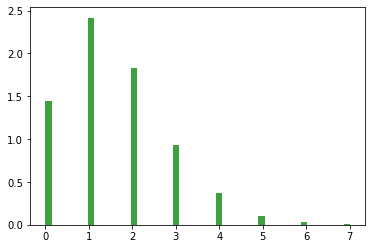

In [35]:
plt.hist(dados['gols_man'], 50, density=True, facecolor='g', alpha=0.75)

In [68]:
# O arbitro tende a dá mais falta para o time mandante ou visitante?
dados_y = dados[['faltas_man', 'faltas_vis']].mean()
dados_x = ['faltas_man', 'faltas_vis']


fig = px.bar(x=dados_x, y= dados_y,width=500, height = 400)
fig.show()

In [59]:
#dados_x = dados_1['ano_campeonato']
#dados_y = dados[['gols_man', 'gols_vis']].mean()

dados_1 = dados.groupby('ano_campeonato')[['faltas_man', 'faltas_vis']].mean()

dados_1['ano'] = dados_1.index

dados_2 = dados_1[dados_1['ano']>2017]

dados_y = dados_2['faltas_man']
#display(dados_1)
#linha x = dados_x
#linha y = dados_y

#dados_gol = px.data


fig = px.bar(dados_2, x = 'ano', y =  ['faltas_man', 'faltas_vis'],width=1000, height = 400 , barmode='group', title = 'Media de faltas por ano')

fig.show()

In [66]:
#dados_x = dados_1['ano_campeonato']
#dados_y = dados[['gols_man', 'gols_vis']].mean()

dados_1 = dados.groupby('arbitro')[['faltas_man', 'faltas_vis']].mean()

dados_1['arbitro'] = dados_1.index


dados_2 = dados_1[dados_1['faltas_man']>0]
dados_y = dados_2['faltas_man']

#display(dados_1)
#linha x = dados_x
#linha y = dados_y

#dados_gol = px.data

fig = px.bar(dados_2, x = 'arbitro', y =  ['faltas_man', 'faltas_vis'],width=1000, height = 400 , barmode='group', title = 'Media de faltas por ano')
fig.update_xaxes(type = 'category')
fig.show()

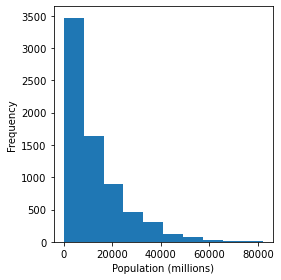

In [76]:
#A torcida influencia no resultado?
ax = (dados['publico']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
plt.tight_layout()
plt.show()


In [ ]:
#Qual turno tem a maior média de gols?

In [ ]:
#Quem faz mais falta, visitante ou mandante?

In [ ]:
#Previsão de gols por partida. (difícil)